In [4]:
import cv2
import numpy as np
from math import radians

def glcm_matrix(image, distance, angle, levels):
    h, w = image.shape
    x_step = int(distance * np.cos(angle))
    y_step = int(distance * np.sin(angle))

    # 修正x_step和y_step，确保不会越界
    x_step = min(x_step, w - 1)
    y_step = min(y_step, h - 1)
    x_step = max(x_step, -w + 1)
    y_step = max(y_step, -h + 1)

    glcm = np.zeros((levels, levels), dtype=np.uint64)

    for y in range(h):
        for x in range(w):
            if x + x_step < w and y + y_step < h and x >= 0 and y >= 0 and x + x_step >= 0 and y + y_step >= 0:
                i, j = image[y, x], image[y + y_step, x + x_step]
                glcm[i, j] += 1

    return glcm / (h * w)

def extract_texture_features(image, distances, angles, levels):
    features_list = []

    for distance in distances:
        for angle in angles:
            glcm = glcm_matrix(image, distance, angle, levels)

            energy = np.trace(glcm)
            entropy = -np.sum(glcm * np.log2(glcm + 1e-6))
            contrast = np.mean(np.abs(np.subtract.outer(np.arange(levels), np.arange(levels))) ** 2 * glcm)
            homogeneity = np.mean(np.divide(1, 1 + np.abs(np.subtract.outer(np.arange(levels), np.arange(levels)))) * glcm)
            correlation = np.mean(np.multiply(glcm, np.subtract.outer(np.arange(levels), np.arange(levels))) *
                                 np.divide(np.sum(glcm, axis=1).reshape(-1, 1), np.sum(glcm)))

            features_list.extend([
                energy,
                entropy,
                contrast,
                homogeneity,
                correlation
            ])

    return np.array(features_list)

def radians_to_degrees(radians):
    return np.rad2deg(radians)

# 示例使用
image_path = "C:\\Users\\MYZ\\PycharmProjects\\VIT_Pytorch\\BreaKHis_Datasets\\Original\\Benign_Sample\\Benign_Sample (2).png"
biopsy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
biopsy_image = cv2.equalizeHist(biopsy_image)

levels = np.max(biopsy_image) + 1
distances = [4, 8, 16]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

texture_features = extract_texture_features(biopsy_image, distances, angles, levels)
texture_features

array([3.80310559e-02, 1.23377278e+01, 8.87438228e-02, 1.35599861e-06,
       3.10006254e-07, 4.14627329e-02, 1.22087003e+01, 7.01770433e-02,
       1.47605566e-06, 2.30321552e-07, 4.06956522e-02, 1.22787983e+01,
       8.54088899e-02, 1.41911309e-06, 4.09384569e-07, 4.70683230e-02,
       1.20662097e+01, 5.52403786e-02, 1.65654445e-06, 2.49087540e-07,
       2.85465839e-02, 1.24476464e+01, 1.29044967e-01, 1.06973098e-06,
       5.55985171e-07, 2.79596273e-02, 1.23722493e+01, 1.26753774e-01,
       1.05488403e-06, 6.13070649e-07, 3.15683230e-02, 1.23393339e+01,
       1.19132537e-01, 1.14223514e-06, 5.45898546e-07, 3.19254658e-02,
       1.23213538e+01, 1.11976183e-01, 1.16583061e-06, 5.53702582e-07,
       2.18913043e-02, 1.24072650e+01, 1.53276146e-01, 8.63500373e-07,
       5.38804514e-07, 2.09037267e-02, 1.22205042e+01, 1.51099299e-01,
       8.39020637e-07, 5.68262217e-07, 2.45403727e-02, 1.22340025e+01,
       1.39632512e-01, 9.36935526e-07, 6.30305657e-07, 2.38881988e-02,
      

In [10]:
def convert_features_to_dict(texture_features):
    feature_dict = {}
    for i in range(0, len(texture_features), 5):
        key = f"distance_{i//5+1}_angle_{(i % 5) // 2*45}"
        feature_dict[key] = {
            "energy": texture_features[i],
            "entropy": texture_features[i+1],
            "contrast": texture_features[i+2],
            "homogeneity": texture_features[i+3],
            "correlation": texture_features[i+4],
        }
    return feature_dict


# 转换特征列表为字典
data = convert_features_to_dict(texture_features)
print(data)
def change(data):
    rows = []
    for distance in [4, 8, 16]:
        for angle in [0.0, 45.0, 90.0, 135.0]:
            key = f"distance_{distance}_angle_{angle}"
            rows.append({
                "distance": distance,
                "angle": angle,
                "energy": data[key]["energy"],
                "entropy": data[key]["entropy"],
                "contrast": data[key]["contrast"],
                "homogeneity": data[key]["homogeneity"],
                "correlation": data[key]["correlation"],
             })

    column_names = ["distance", "angle", "energy", "entropy", "contrast", "homogeneity", "correlation"]
    df = pd.DataFrame(rows, columns=column_names)
    return df

# 创建 DataFrame
df = change(data)


{'distance_1_angle_0': {'energy': 0.03803105590062112, 'entropy': 12.337727773567092, 'contrast': 0.08874382284413213, 'homogeneity': 1.3559986095232238e-06, 'correlation': 3.100062542553777e-07}, 'distance_2_angle_0': {'energy': 0.04146273291925466, 'entropy': 12.208700326547028, 'contrast': 0.07017704332245063, 'homogeneity': 1.4760556613778495e-06, 'correlation': 2.3032155164690455e-07}, 'distance_3_angle_0': {'energy': 0.04069565217391305, 'entropy': 12.278798281838972, 'contrast': 0.0854088898652829, 'homogeneity': 1.4191130902432492e-06, 'correlation': 4.0938456923747943e-07}, 'distance_4_angle_0': {'energy': 0.047068322981366456, 'entropy': 12.066209669666984, 'contrast': 0.05524037862268293, 'homogeneity': 1.6565444547527307e-06, 'correlation': 2.4908754027469764e-07}, 'distance_5_angle_0': {'energy': 0.028546583850931673, 'entropy': 12.447646437073816, 'contrast': 0.12904496679839142, 'homogeneity': 1.0697309829138012e-06, 'correlation': 5.559851710714804e-07}, 'distance_6_ang

KeyError: 'distance_4_angle_0.0'

In [ ]:
from matplotlib import pyplot as plt

tidy_df = df.melt(id_vars=['angle', 'distance'],
                  value_vars=['energy', 'entropy', 'contrast', 'homogeneity', 'correlation'],
                  var_name='feature', value_name='value')
import seaborn as sns

# 创建一个颜色映射
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 绘制热力图
sns.heatmap(tidy_df.pivot_table(index='distance', columns='angle', values='value'),
            cmap=cmap, annot=True, fmt=".4f", linewidths=.5)

# 添加图例和标题
plt.title('')
plt.xlabel('Angle')
plt.ylabel('Distance')

# 显示图形
plt.show()


In [ ]:
def round_to_four_places(x):
    if isinstance(x, (int, float)):
        return round(x, 6)
    else:
        return x

# 应用到整个DataFrame
df = df.applymap(round_to_four_places)

XXXXXXXXXXXXXXXXX

In [11]:
import cv2
import numpy as np
from math import radians

def glcm_matrix(image, distance, angle, levels):
    h, w = image.shape
    x_step = int(distance * np.cos(angle))
    y_step = int(distance * np.sin(angle))

    # 修正x_step和y_step，确保不会越界
    x_step = min(x_step, w - 1)
    y_step = min(y_step, h - 1)
    x_step = max(x_step, -w + 1)
    y_step = max(y_step, -h + 1)

    glcm = np.zeros((levels, levels), dtype=np.uint64)

    for y in range(h):
        for x in range(w):
            if x + x_step < w and y + y_step < h and x >= 0 and y >= 0 and x + x_step >= 0 and y + y_step >= 0:
                i, j = image[y, x], image[y + y_step, x + x_step]
                glcm[i, j] += 1

    return glcm / (h * w)

def extract_texture_features(image, distances, angles, levels):
    features = {}

    for distance in distances:
        for angle in angles:
            glcm = glcm_matrix(image, distance, angle, levels)

            energy = np.trace(glcm)
            entropy = -np.sum(glcm * np.log2(glcm + 1e-6))  # 避免对零值取对数
            contrast = np.mean(np.abs(np.subtract.outer(np.arange(levels), np.arange(levels))) ** 2 * glcm)
            homogeneity = np.mean(np.divide(1, 1 + np.abs(np.subtract.outer(np.arange(levels), np.arange(levels)))) * glcm)
            correlation = np.mean(np.multiply(glcm, np.subtract.outer(np.arange(levels), np.arange(levels))) *
                             np.divide(np.sum(glcm, axis=1).reshape(-1, 1), np.sum(glcm)))

            features[f'distance_{distance}_angle_{radians_to_degrees(angle)}_energy'] = energy
            features[f'distance_{distance}_angle_{radians_to_degrees(angle)}_entropy'] = entropy
            features[f'distance_{distance}_angle_{radians_to_degrees(angle)}_contrast'] = contrast
            features[f'distance_{distance}_angle_{radians_to_degrees(angle)}_homogeneity'] = homogeneity
            features[f'distance_{distance}_angle_{radians_to_degrees(angle)}_correlation'] = correlation

    return features

def radians_to_degrees(radians):
    return np.rad2deg(radians)

In [12]:
import pandas as pd
def change(texture_features):
    data = texture_features
    rows = []
    for distance in [4, 8, 16]:
        for angle in [0.0, 45.0, 90.0, 135.0]:
            key = f"distance_{distance}_angle_{angle}"
            rows.append({
                "distance": distance,
                "angle": angle,
                "energy": data[f"{key}_energy"],
                "entropy": data[f"{key}_entropy"],
                "contrast": data[f"{key}_contrast"],
                "homogeneity": data[f"{key}_homogeneity"],
                "correlation": data[f"{key}_correlation"],
             })

    column_names = ["distance", "angle", "energy", "entropy", "contrast", "homogeneity", "correlation"]
    df = pd.DataFrame(rows, columns=column_names)
    return df

In [13]:
# 示例使用
image_path = "C:\\Users\\MYZ\\PycharmProjects\\VIT_Pytorch\\BreaKHis_Datasets\\Original\\Benign_Sample\\Benign_Sample (2).png"
biopsy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
biopsy_image = cv2.equalizeHist(biopsy_image)

levels = np.max(biopsy_image) + 1
distances = [4, 8, 16]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

texture_features = extract_texture_features(biopsy_image, distances, angles, levels)


In [14]:
df = change(texture_features)
df

,distance,angle,energy,entropy,contrast,homogeneity,correlation
0,4,0.0,0.038031,12.337728,0.088744,1.355999e-06,3.100063e-07
1,4,45.0,0.041463,12.208700,0.070177,1.476056e-06,2.303216e-07
2,4,90.0,0.040696,12.278798,0.085409,1.419113e-06,4.093846e-07
3,4,135.0,0.047068,12.066210,0.055240,1.656544e-06,2.490875e-07
4,8,0.0,0.028547,12.447646,0.129045,1.069731e-06,5.559852e-07
5,8,45.0,0.027960,12.372249,0.126754,1.054884e-06,6.130706e-07
6,8,90.0,0.031568,12.339334,0.119133,1.142235e-06,5.458985e-07
7,8,135.0,0.031925,12.321354,0.111976,1.165831e-06,5.537026e-07
8,16,0.0,0.021891,12.407265,0.153276,8.635004e-07,5.388045e-07
9,16,45.0,0.020904,12.220504,0.151099,8.390206e-07,5.682622e-07


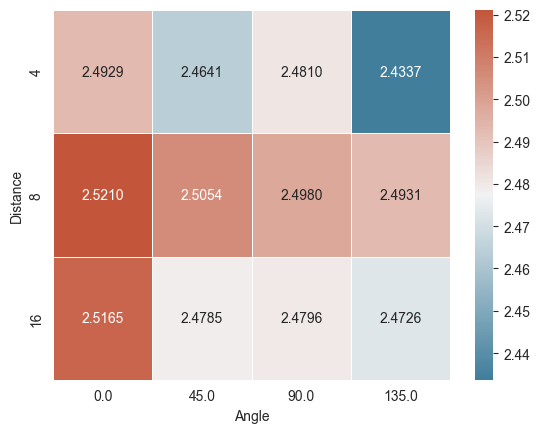

In [19]:
from matplotlib import pyplot as plt

tidy_df = df.melt(id_vars=['angle', 'distance'],
                  value_vars=['energy', 'entropy', 'contrast', 'homogeneity', 'correlation'],
                  var_name='feature', value_name='value')
import seaborn as sns

# 创建一个颜色映射
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 绘制热力图
sns.heatmap(tidy_df.pivot_table(index='distance', columns='angle', values='value'),
            cmap=cmap, annot=True, fmt=".4f", linewidths=.5)

# 添加图例和标题
plt.title('')
plt.xlabel('Angle')
plt.ylabel('Distance')

# 显示图形
plt.show()